# Heart Diseases Prediction

## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('heart_data.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Data Exploration

In [3]:
df.size

5756310

In [4]:
df.shape

(319795, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

This dataset comprises 319,795 records and 18 columns, representing a diverse range of health- information. The primary target variable, 'heart disease and serves as the focus of our logistic regression analysis. Other key features include BMI, lifestyle factors (smoking, alcohol consumption), medical history indicators (stroke, diabetes), demographics (sex, age category), and overall health metrics (physical activity, sleeping time). 

## Checking for missing values

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df.duplicated().sum()

18078

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,301717,301717.000000,301717,301717,301717,301717.000000,301717.000000,301717,301717,301717,301717,301717,301717,301717,301717.000000,301717,301717,301717
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,274456,NaN,174312,280136,289653,NaN,NaN,257362,159671,31670,227724,251796,230412,104796,NaN,259066,289941,272425
mean,NaN,28.441970,NaN,NaN,NaN,3.572298,4.121475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.084559,NaN,NaN,NaN
std,NaN,6.468134,NaN,NaN,NaN,8.140656,8.128288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.467122,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.410000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.650000,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


<Axes: >

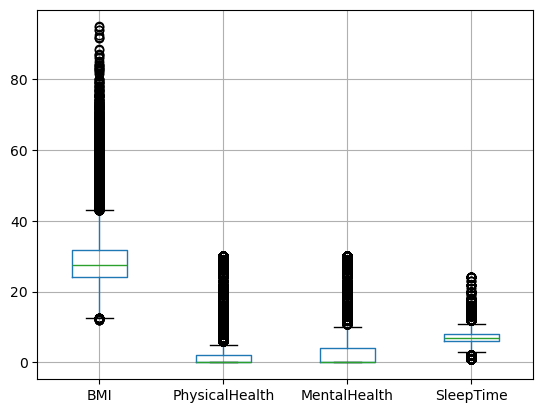

In [12]:
df.boxplot()

In [13]:
df[['PhysicalHealth','MentalHealth']].corr()

,PhysicalHealth,MentalHealth
PhysicalHealth,1.000000,0.279657
MentalHealth,0.279657,1.000000


In [14]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [15]:
df.drop(columns=['KidneyDisease','SkinCancer','PhysicalHealth','MentalHealth','Race'], axis=1,inplace=True)

In [16]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,No,16.60,Yes,No,No,No,Female,55-59,Yes,Yes,Very good,5.0,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,No,Yes,Very good,7.0,No
2,No,26.58,Yes,No,No,No,Male,65-69,Yes,Yes,Fair,8.0,Yes
3,No,24.21,No,No,No,No,Female,75-79,No,No,Good,6.0,No
4,No,23.71,No,No,No,Yes,Female,40-44,No,Yes,Very good,8.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,Yes,Male,60-64,Yes,No,Fair,6.0,Yes
319791,No,29.84,Yes,No,No,No,Male,35-39,No,Yes,Very good,5.0,Yes
319792,No,24.24,No,No,No,No,Female,45-49,No,Yes,Good,6.0,No
319793,No,32.81,No,No,No,No,Female,25-29,No,No,Good,12.0,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   DiffWalking       301717 non-null  object 
 6   Sex               301717 non-null  object 
 7   AgeCategory       301717 non-null  object 
 8   Diabetic          301717 non-null  object 
 9   PhysicalActivity  301717 non-null  object 
 10  GenHealth         301717 non-null  object 
 11  SleepTime         301717 non-null  float64
 12  Asthma            301717 non-null  object 
dtypes: float64(2), object(11)
memory usage: 32.2+ MB


In [18]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma'],
      dtype='object')

# Univariate Analysis

In [19]:
df['HeartDisease'].value_counts(normalize =True)*100

HeartDisease
No     90.964712
Yes     9.035288
Name: proportion, dtype: float64

The problem with the dataset is imbalance in the class

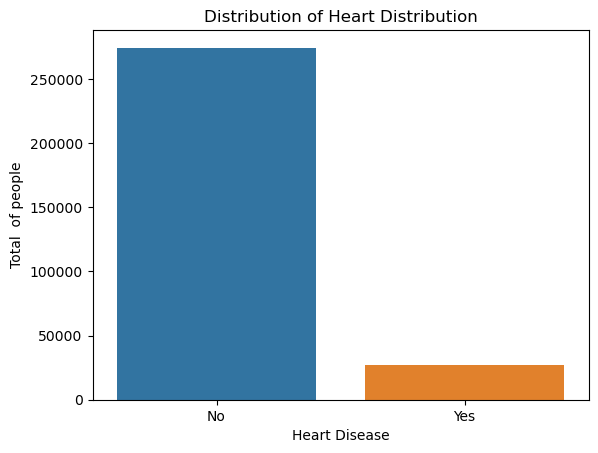

In [20]:
sns.countplot(x='HeartDisease' ,data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Total  of people')
plt.title('Distribution of Heart Distribution')
plt.show()

In [21]:
df['Sex'].value_counts()

Sex
Female    159671
Male      142046
Name: count, dtype: int64

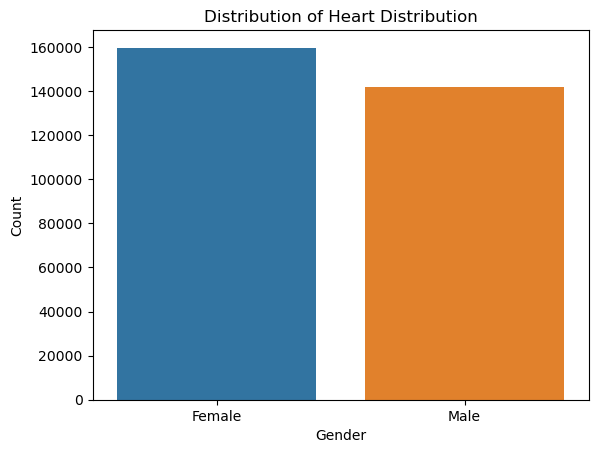

In [22]:
sns.countplot(x='Sex',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Heart Distribution')
plt.show()

# Bivariate Analysis

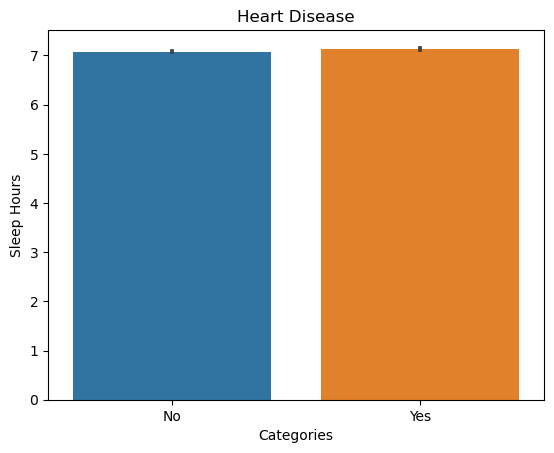

In [23]:
sns.barplot(x='HeartDisease', y='SleepTime', data=df)


plt.xlabel('Categories')
plt.ylabel('Sleep Hours')
plt.title('Heart Disease')
plt.show()

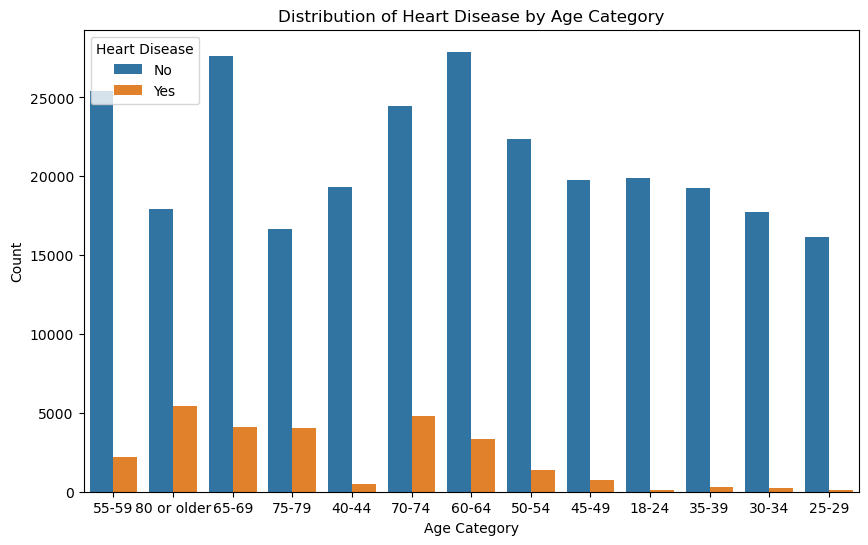

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Age Category')
plt.legend(title='Heart Disease', loc='upper left')
plt.show()

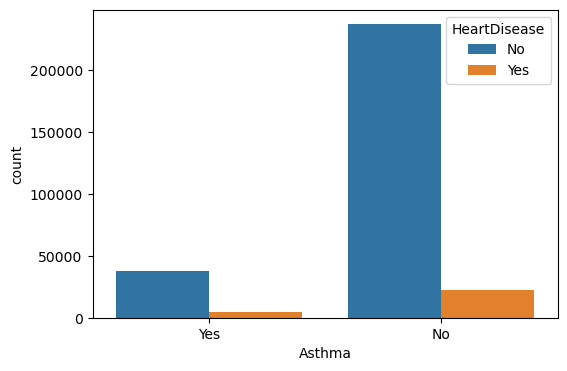

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='Asthma',hue='HeartDisease')
plt.show()

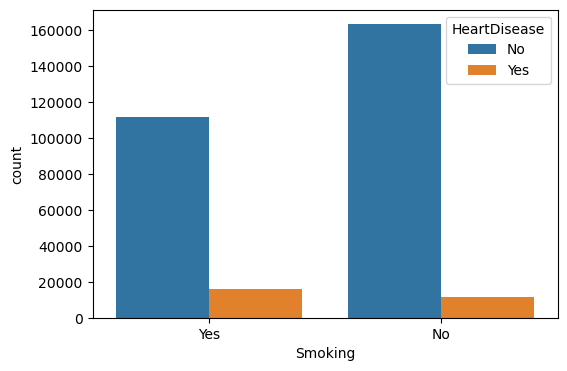

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='Smoking',hue='HeartDisease')
plt.show()

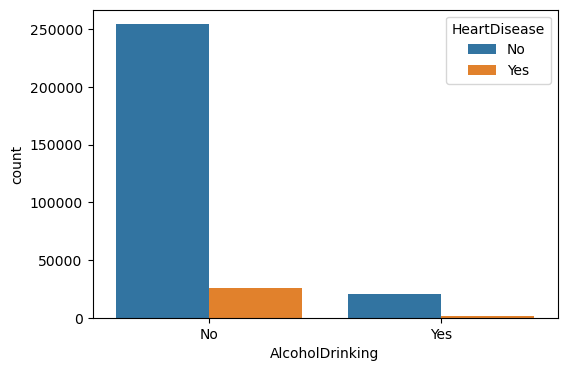

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='AlcoholDrinking',hue='HeartDisease')
plt.show()

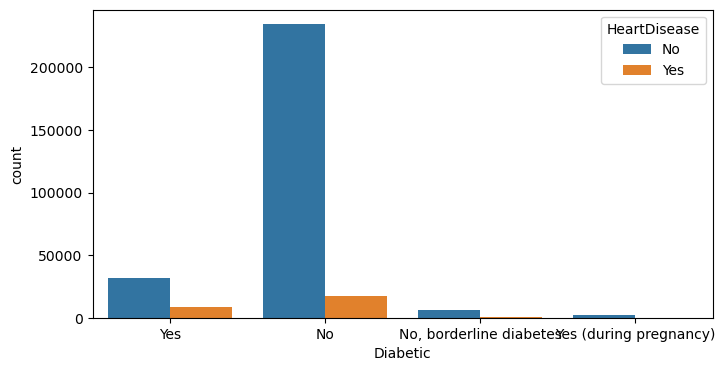

In [28]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df,x='Diabetic',hue='HeartDisease')
plt.show()

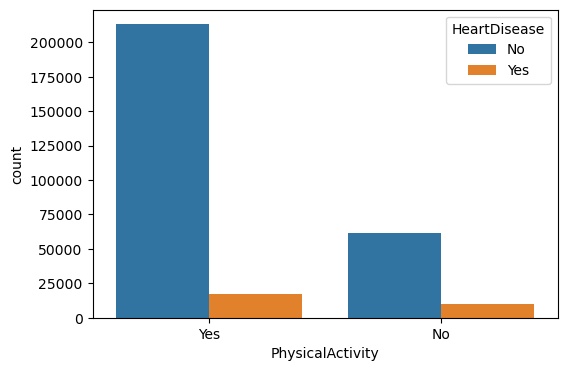

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='PhysicalActivity',hue='HeartDisease')
plt.show()

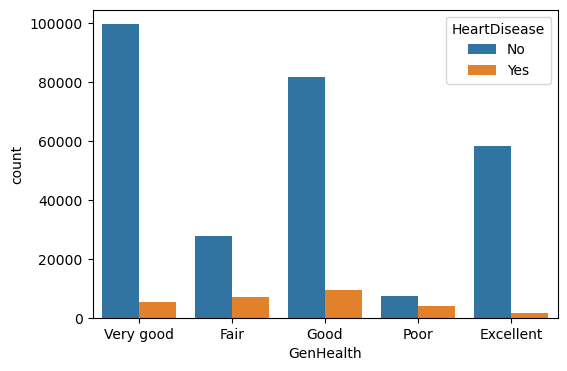

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='GenHealth',hue='HeartDisease')
plt.show()

# Pairplot

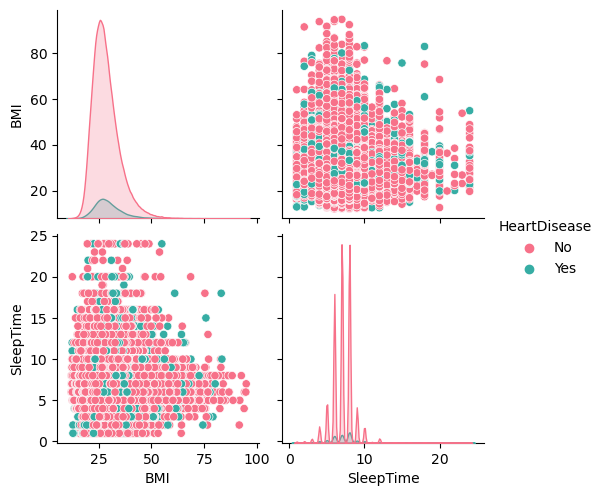

In [31]:
sns.pairplot(df, hue = 'HeartDisease', kind = "scatter", palette = "husl")
plt.show()

# Converting AgeCategory to Mid value

In [32]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [33]:
df['AgeCategory']=df['AgeCategory'].str.replace('18-24','21').str.replace('25-29','27').str.replace('30-34','32').str.replace('35-39','37').str.replace('40-44','42').str.replace('45-49','47').str.replace('50-54','52').str.replace('55-59','57').str.replace('60-64','62').str.replace('65-69','67').str.replace('70-74','72').str.replace('75-79','77').str.replace('80 or older','85')

In [34]:
df['AgeCategory'].unique()

array(['57', '85', '67', '77', '42', '72', '62', '52', '47', '21', '37',
       '32', '27'], dtype=object)

In [35]:
df['AgeCategory']=df['AgeCategory'].astype('float')

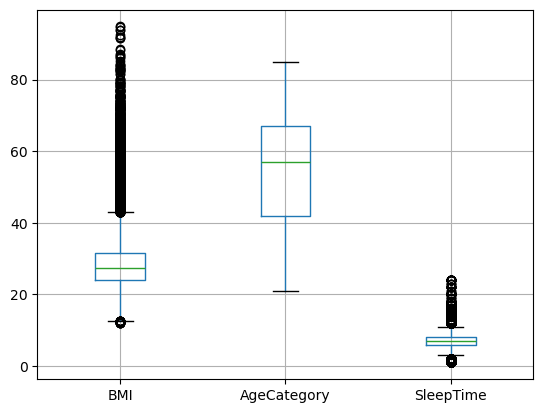

In [36]:
df.boxplot()
plt.show()

# IQR Score

In [37]:
columns_to_treat = ['BMI', 'SleepTime']

for col in columns_to_treat:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)
  outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

  
median_value = df[col].median()

df.loc[outliers, col] = median_value


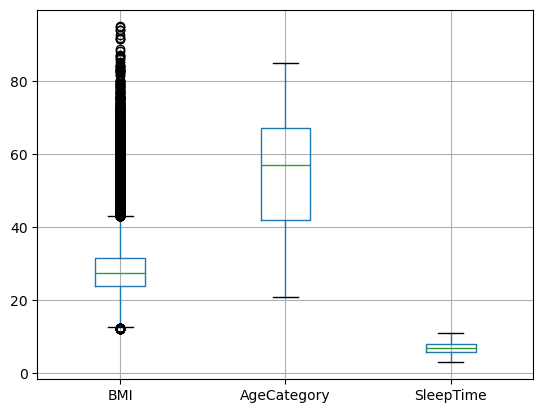

In [38]:
df.boxplot()
plt.show()

# Label Encoding

In [39]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity',
                    'GenHealth','Asthma']  


le = LabelEncoder()


for col in columns_to_encode:
  df[col] = le.fit_transform(df[col])

In [41]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,0,16.60,1,0,0,0,0,57.0,2,1,4,5.0,1
1,0,20.34,0,0,1,0,0,85.0,0,1,4,7.0,0
2,0,26.58,1,0,0,0,1,67.0,2,1,1,8.0,1
3,0,24.21,0,0,0,0,0,77.0,0,0,2,6.0,0
4,0,23.71,0,0,0,1,0,42.0,0,1,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,1,1,62.0,2,0,1,6.0,1
319791,0,29.84,1,0,0,0,1,37.0,0,1,4,5.0,1
319792,0,24.24,0,0,0,0,0,47.0,0,1,2,6.0,0
319793,0,32.81,0,0,0,0,0,27.0,0,0,2,7.0,0


# Split Test and Train

In [42]:
#Dividing the dataset into train and test
X = df.drop('HeartDisease',axis=1)
y = df[['HeartDisease']]

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

# Scaling the data

In [43]:
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [44]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
188627,-0.516354,-0.856197,-0.277204,-0.203405,-0.416246,1.060798,1.209591,-0.432241,0.557507,-1.469684,-0.033557,-0.404907
301971,2.203127,-0.856197,-0.277204,-0.203405,2.402426,-0.942686,0.666739,-0.432241,0.557507,-0.146465,0.766360,-0.404907
203082,0.842614,-0.856197,-0.277204,-0.203405,-0.416246,-0.942686,-0.690392,-0.432241,-1.793699,-1.469684,-0.833474,2.469703
156541,-0.861120,1.167955,-0.277204,-0.203405,-0.416246,1.060798,0.938165,2.299021,-1.793699,-0.808075,0.766360,2.469703
88990,-0.401947,1.167955,-0.277204,-0.203405,-0.416246,-0.942686,-0.418966,0.933390,0.557507,-0.146465,0.766360,-0.404907


In [45]:
y_train.head()

,HeartDisease
188627,0
301971,0
203082,0
156541,1
88990,0


# LOGISTIC REGRESSION 

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Test

In [47]:
y_proba_test = model.predict_proba(X_test)
y_proba_test

array([[0.9699675 , 0.0300325 ],
       [0.97104885, 0.02895115],
       [0.64182792, 0.35817208],
       ...,
       [0.92831855, 0.07168145],
       [0.95362756, 0.04637244],
       [0.90782999, 0.09217001]])

In [48]:
y_pred_test= model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
metrics.accuracy_score(y_test,y_pred_test)

0.9096623801316894

In [50]:
model.coef_

array([[ 0.08853164,  0.23164064, -0.08153285,  0.23739503,  0.21792419,
         0.37217902,  0.9825688 ,  0.22885922, -0.06161801, -0.05219194,
        -0.08677883,  0.13218877]])

In [51]:
model.intercept_

array([-2.94486089])

In [52]:
print('Intercept of the logistic model fitted is: ',model.intercept_)
print('Coefficients of the features are: ',model.coef_)

Intercept of the logistic model fitted is:  [-2.94486089]
Coefficients of the features are:  [[ 0.08853164  0.23164064 -0.08153285  0.23739503  0.21792419  0.37217902
   0.9825688   0.22885922 -0.06161801 -0.05219194 -0.08677883  0.13218877]]


In [53]:
columns_list = df.columns.tolist()
columns_list

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma']

In [54]:
coef = model.coef_.squeeze().tolist()
coef

[0.08853163503840557,
 0.2316406413194135,
 -0.08153285499550303,
 0.23739503172086718,
 0.21792419264674676,
 0.3721790227795452,
 0.9825687992907961,
 0.2288592203875738,
 -0.061618005734248735,
 -0.0521919423512437,
 -0.0867788285111319,
 0.13218876516410863]

In [55]:
model_coef = list(zip(columns_list, coef))
model_coef

[('HeartDisease', 0.08853163503840557),
 ('BMI', 0.2316406413194135),
 ('Smoking', -0.08153285499550303),
 ('AlcoholDrinking', 0.23739503172086718),
 ('Stroke', 0.21792419264674676),
 ('DiffWalking', 0.3721790227795452),
 ('Sex', 0.9825687992907961),
 ('AgeCategory', 0.2288592203875738),
 ('Diabetic', -0.061618005734248735),
 ('PhysicalActivity', -0.0521919423512437),
 ('GenHealth', -0.0867788285111319),
 ('SleepTime', 0.13218876516410863)]

Inference: 
     
    From the above set of coefficents we see that BMI, Smoking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, Asthma and Kidney Disease are the features which help in predicting whether or not the person can have heart disease or not.

In [56]:
model_score = model.score(X_test,y_test)
model_score

0.9096623801316894

In [57]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     82369
           1       0.49      0.07      0.12      8147

    accuracy                           0.91     90516
   macro avg       0.70      0.53      0.54     90516
weighted avg       0.88      0.91      0.88     90516



Inference

We see that accuracy is 0.92, but recall for class-1 is quite low  due to class imbalance (HeartDisease class 0- 90.9%, class 1- 9.1%)

In [58]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_test))

[[81755   614]
 [ 7563   584]]


In [59]:
conf_matrix = np.array([[81755,614],
                        [7563,584]])
TN=conf_matrix[0,0]
FP=conf_matrix[0,1]
FN=conf_matrix[1,0]
TP=conf_matrix[1,1]

In [60]:
print("True Positive :", TP)
print("True Negative :", TN)
print("False Positive :",FP)
print("False Negative :",FN)

True Positive : 584
True Negative : 81755
False Positive : 614
False Negative : 7563


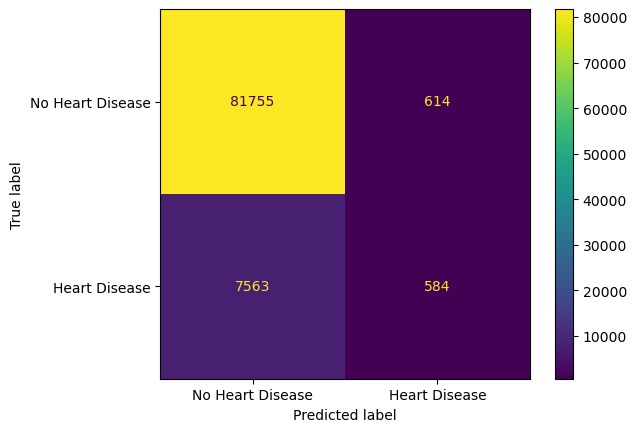

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)  # Calculate confusion matrix
class_labels = ["No Heart Disease", "Heart Disease"]
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)  
disp.plot()
plt.show()

# AUC and RUC Curve

In [62]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

auc_roc = roc_auc_score(y_test,y_pred_test)
print(f"AUC-ROC Score: {auc_roc}")

AUC-ROC Score: 0.5321142836649912


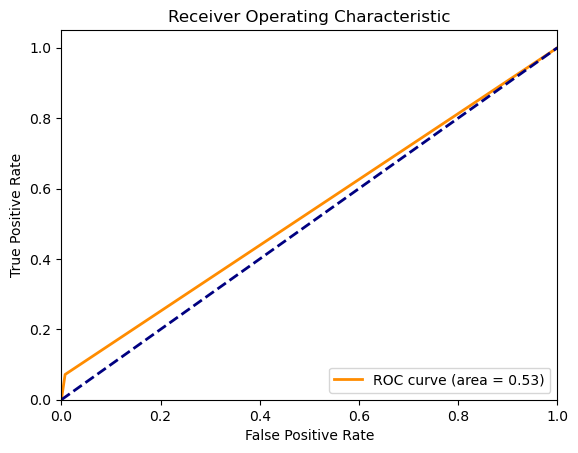

In [63]:
fpr, tpr, _= roc_curve(y_test, y_pred_test)
plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Inference - An AUC score of 0.53 signifies that the model is not good. - It is not able to correctly classify 
whether the individual has Heart Disease or not with an accuracy

## Conclusion